In [1]:
import os
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from skimage.transform import resize

In [13]:
import numpy as np
import pandas as pd
import random as ran
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from Methods import load_images, plot_sample_images, plot_model_metrics, plot_images_with_predictions, plot_confusion_matrix, plot_mismatched_images

This is our initial model, using images without background noise.

In [3]:
image_dir = os.path.dirname(os.getcwd())+"\\Screenshots\\Objects\\"
data = load_images(image_dir)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     720 non-null    int64 
 1   filename  720 non-null    object
 2   label     720 non-null    object
 3   img       720 non-null    object
dtypes: int64(1), object(3)
memory usage: 22.6+ KB


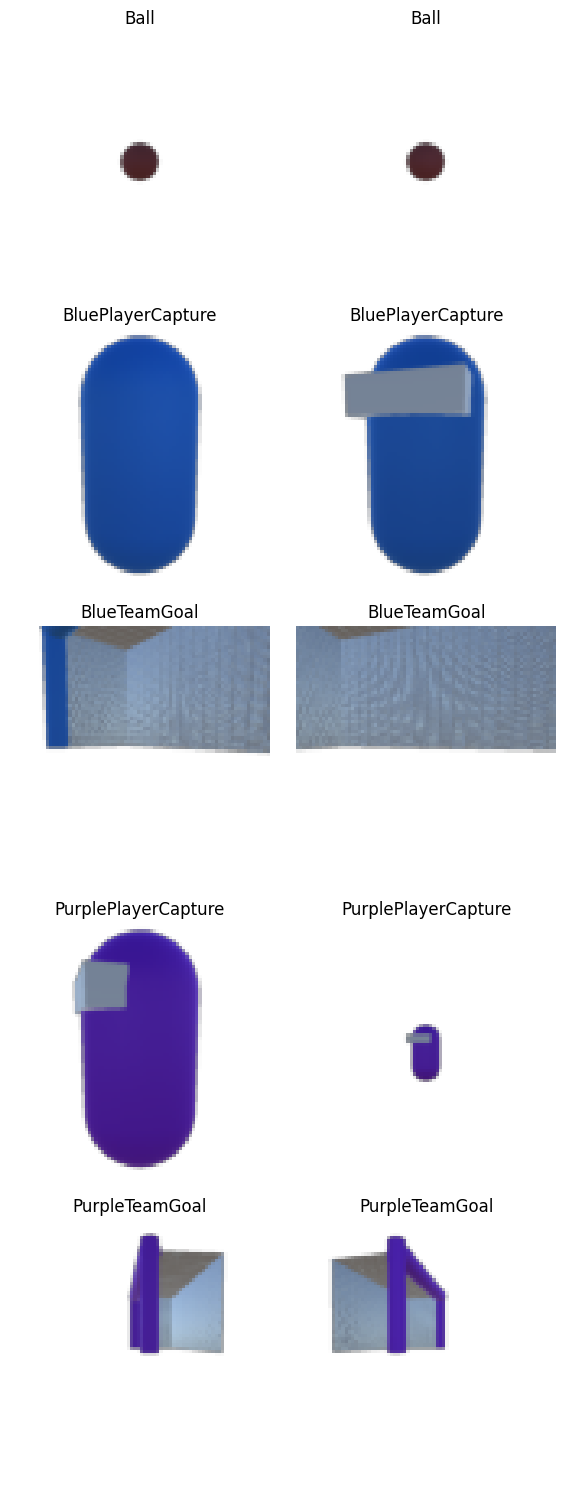

In [14]:
plot_sample_images(data)

In [4]:
#Splitting the data into training and testing
train_df, test_df = train_test_split(data, test_size=0.3)

# Datagen for training data. Augment the data by rotating, shifting, flipping, to make the model more robust and less prone to overfitting
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_dataframe(dataframe = train_df,
    directory=image_dir,
    target_size=(64, 64),
    x_col='filename',
    y_col='label',
    batch_size=32,
    class_mode='categorical'  # or 'categorical' based on your problem
)



Found 504 validated image filenames belonging to 5 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(64, 64),
    batch_size=32,
    class_mode= "categorical",  # or 'categorical'
    shuffle=False
)

Found 216 validated image filenames belonging to 5 classes.


In [6]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),  # Adjust input_shape based on your image dimensions
    MaxPooling2D(2, 2),
    # Add more layers as needed
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # or more units with 'softmax' for multi-class classification
])

model.compile(optimizer=Adam(learning_rate=0.0002), loss='categorical_crossentropy', metrics=['accuracy'])
initial_model = model.fit(train_generator,validation_data = test_generator, epochs=30)

Epoch 1/30


C:\Users\Søren Merved\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Søren Merved\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2726 - loss: 1.4372 - val_accuracy: 0.3657 - val_loss: 1.1863
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4958 - loss: 1.1760 - val_accuracy: 0.7824 - val_loss: 0.9274
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7330 - loss: 0.9276 - val_accuracy: 0.7639 - val_loss: 0.7032
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7661 - loss: 0.7070 - val_accuracy: 0.9120 - val_loss: 0.5156
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8787 - loss: 0.5661 - val_accuracy: 0.8472 - val_loss: 0.4662
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8677 - loss: 0.4951 - val_accuracy: 0.8333 - val_loss: 0.4228
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8799 - loss: 0.4169 - val_accuracy: 0.9537 - val_loss: 0.3208
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9257 - loss: 0.3626 - val_accuracy: 0.9306 - val_loss: 0.

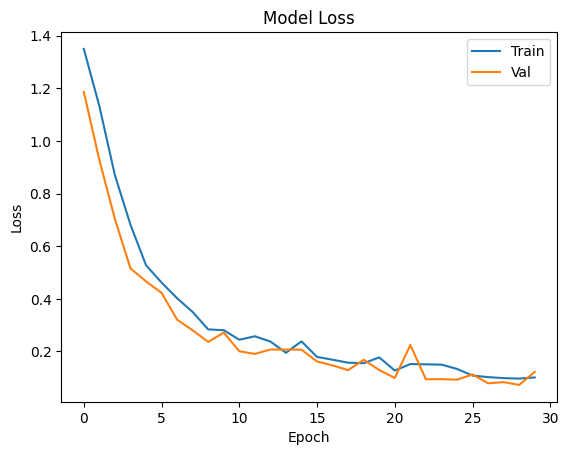

In [10]:
plot_model_metrics(initial_model)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


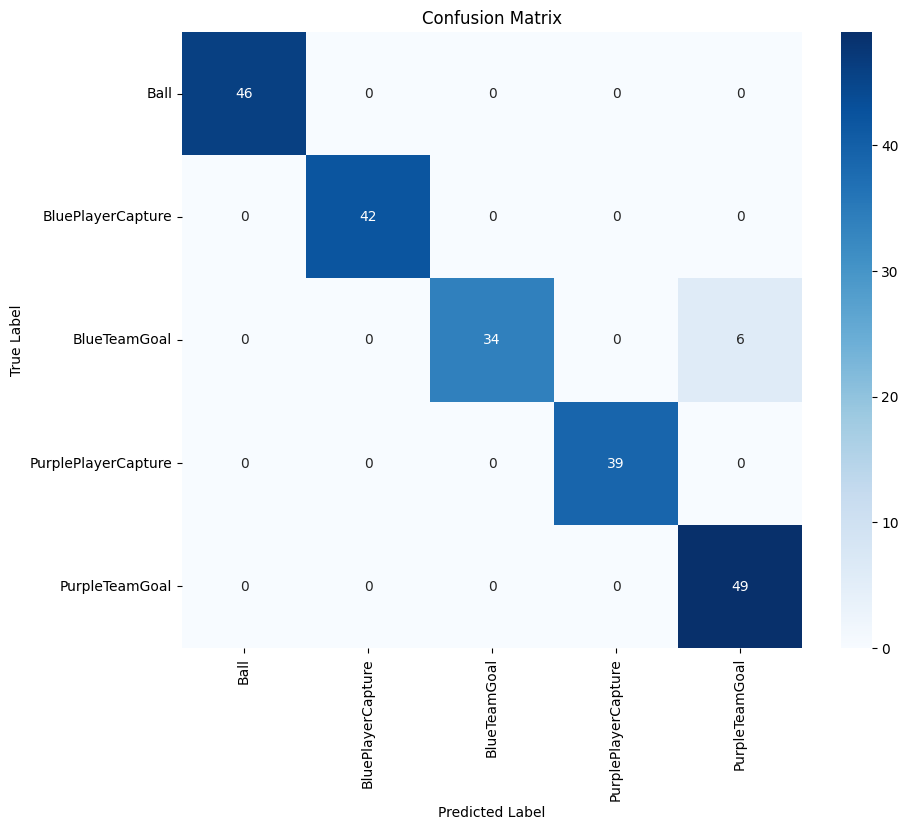

In [11]:
test_labels = test_generator.classes

# Predict the probabilities on the test data
predictions = model.predict(test_generator)

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_classes)

plot_confusion_matrix(cm, test_generator)